# Predicting Birthweight with Machine Learning Models

**Name**: Emily Inga

In this project, a machine learning model will be made to predict the birth weight of new borns from a dataset of babies. The dataset includes information about the birthweight, gestation, parity, height, and weight of the baby. The age of the mother and whether or not she smoked was also taken into account. Each step is laid out with an explanation following. 

Data Source: babiesite.

URL: https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLernal 

## Part 1

Loads the data from the URL to the data frame. All numeric calculations will be rounded to two decimal points

In [4]:
import pandas as pd
import numpy as np

# Loads the data directly from the URL into a dataframe
url = 'https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K'
df = pd.read_csv(url)

# Prints out the head of the df
print(df.head)

<bound method NDFrame.head of       case  bwt  gestation  parity   age  height  weight  smoke
0        1  120      284.0       0  27.0    62.0   100.0    0.0
1        2  113      282.0       0  33.0    64.0   135.0    0.0
2        3  128      279.0       0  28.0    64.0   115.0    1.0
3        4  123        NaN       0  36.0    69.0   190.0    0.0
4        5  108      282.0       0  23.0    67.0   125.0    1.0
...    ...  ...        ...     ...   ...     ...     ...    ...
1231  1232  113      275.0       1  27.0    60.0   100.0    0.0
1232  1233  128      265.0       0  24.0    67.0   120.0    0.0
1233  1234  130      291.0       0  30.0    65.0   150.0    1.0
1234  1235  125      281.0       1  21.0    65.0   110.0    0.0
1235  1236  117      297.0       0  38.0    65.0   129.0    0.0

[1236 rows x 8 columns]>


## Part 2
Prepares the data for analysis.
* Performs EDA using the dataset to demonstrate pattern
* Handles any missing data and invalid data. 
* Plots a histogram of the birth weight and explain the overall distribution.  

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Inspects data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bwt        1236 non-null   int64  
 1   gestation  1236 non-null   float64
 2   age        1236 non-null   float64
 3   height     1236 non-null   float64
 4   weight     1236 non-null   float64
 5   smoke      1236 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 58.1 KB
None
               bwt    gestation          age       height       weight  \
count  1236.000000  1236.000000  1236.000000  1236.000000  1236.000000   
mean    119.576861   279.345469    27.253236    64.046926   128.520227   
std      18.236452    15.943257     5.776943     2.510751    20.672940   
min      55.000000   148.000000    15.000000    53.000000    87.000000   
25%     108.750000   272.000000    23.000000    62.000000   115.000000   
50%     120.000000   280.000000    26.000000    64.000000   125.000000   


In [66]:
# Gestation, age, height, and weight are continuous variables with missing values
# To fill the missing values the median will be used
# Smoke will be filled with the mode of 0 or 1
df['gestation'] = df['gestation'].fillna(df['gestation'].median())
df['age'] = df['age'].fillna(df['age'].median())
df['height'] = df['height'].fillna(df['height'].median())
df['weight'] = df['weight'].fillna(df['weight'].median())
df['smoke'] = df['smoke'].fillna(df['smoke'].mode()[0])

# Checks if there are any missing values left. (There shouldn't be)
print(df.isnull().sum())

bwt          0
gestation    0
age          0
height       0
weight       0
smoke        0
dtype: int64


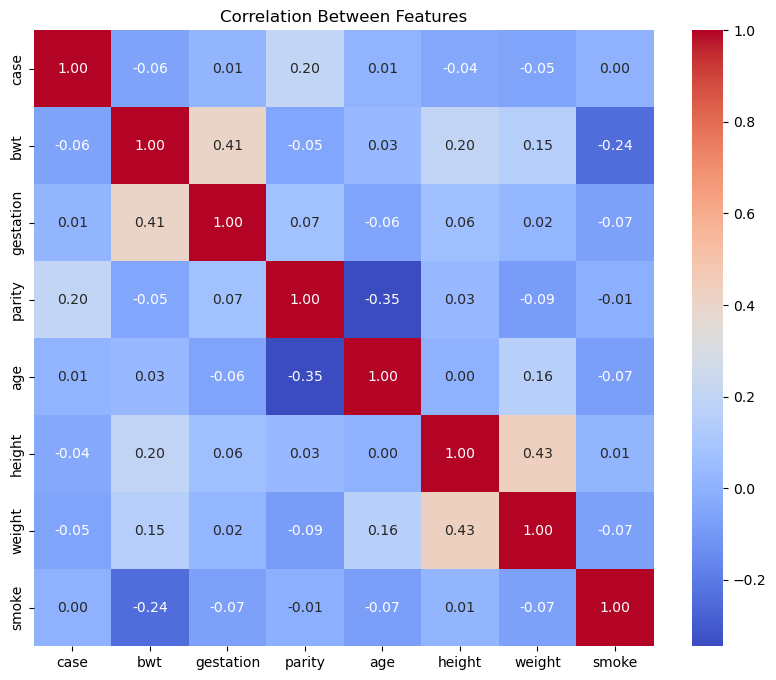

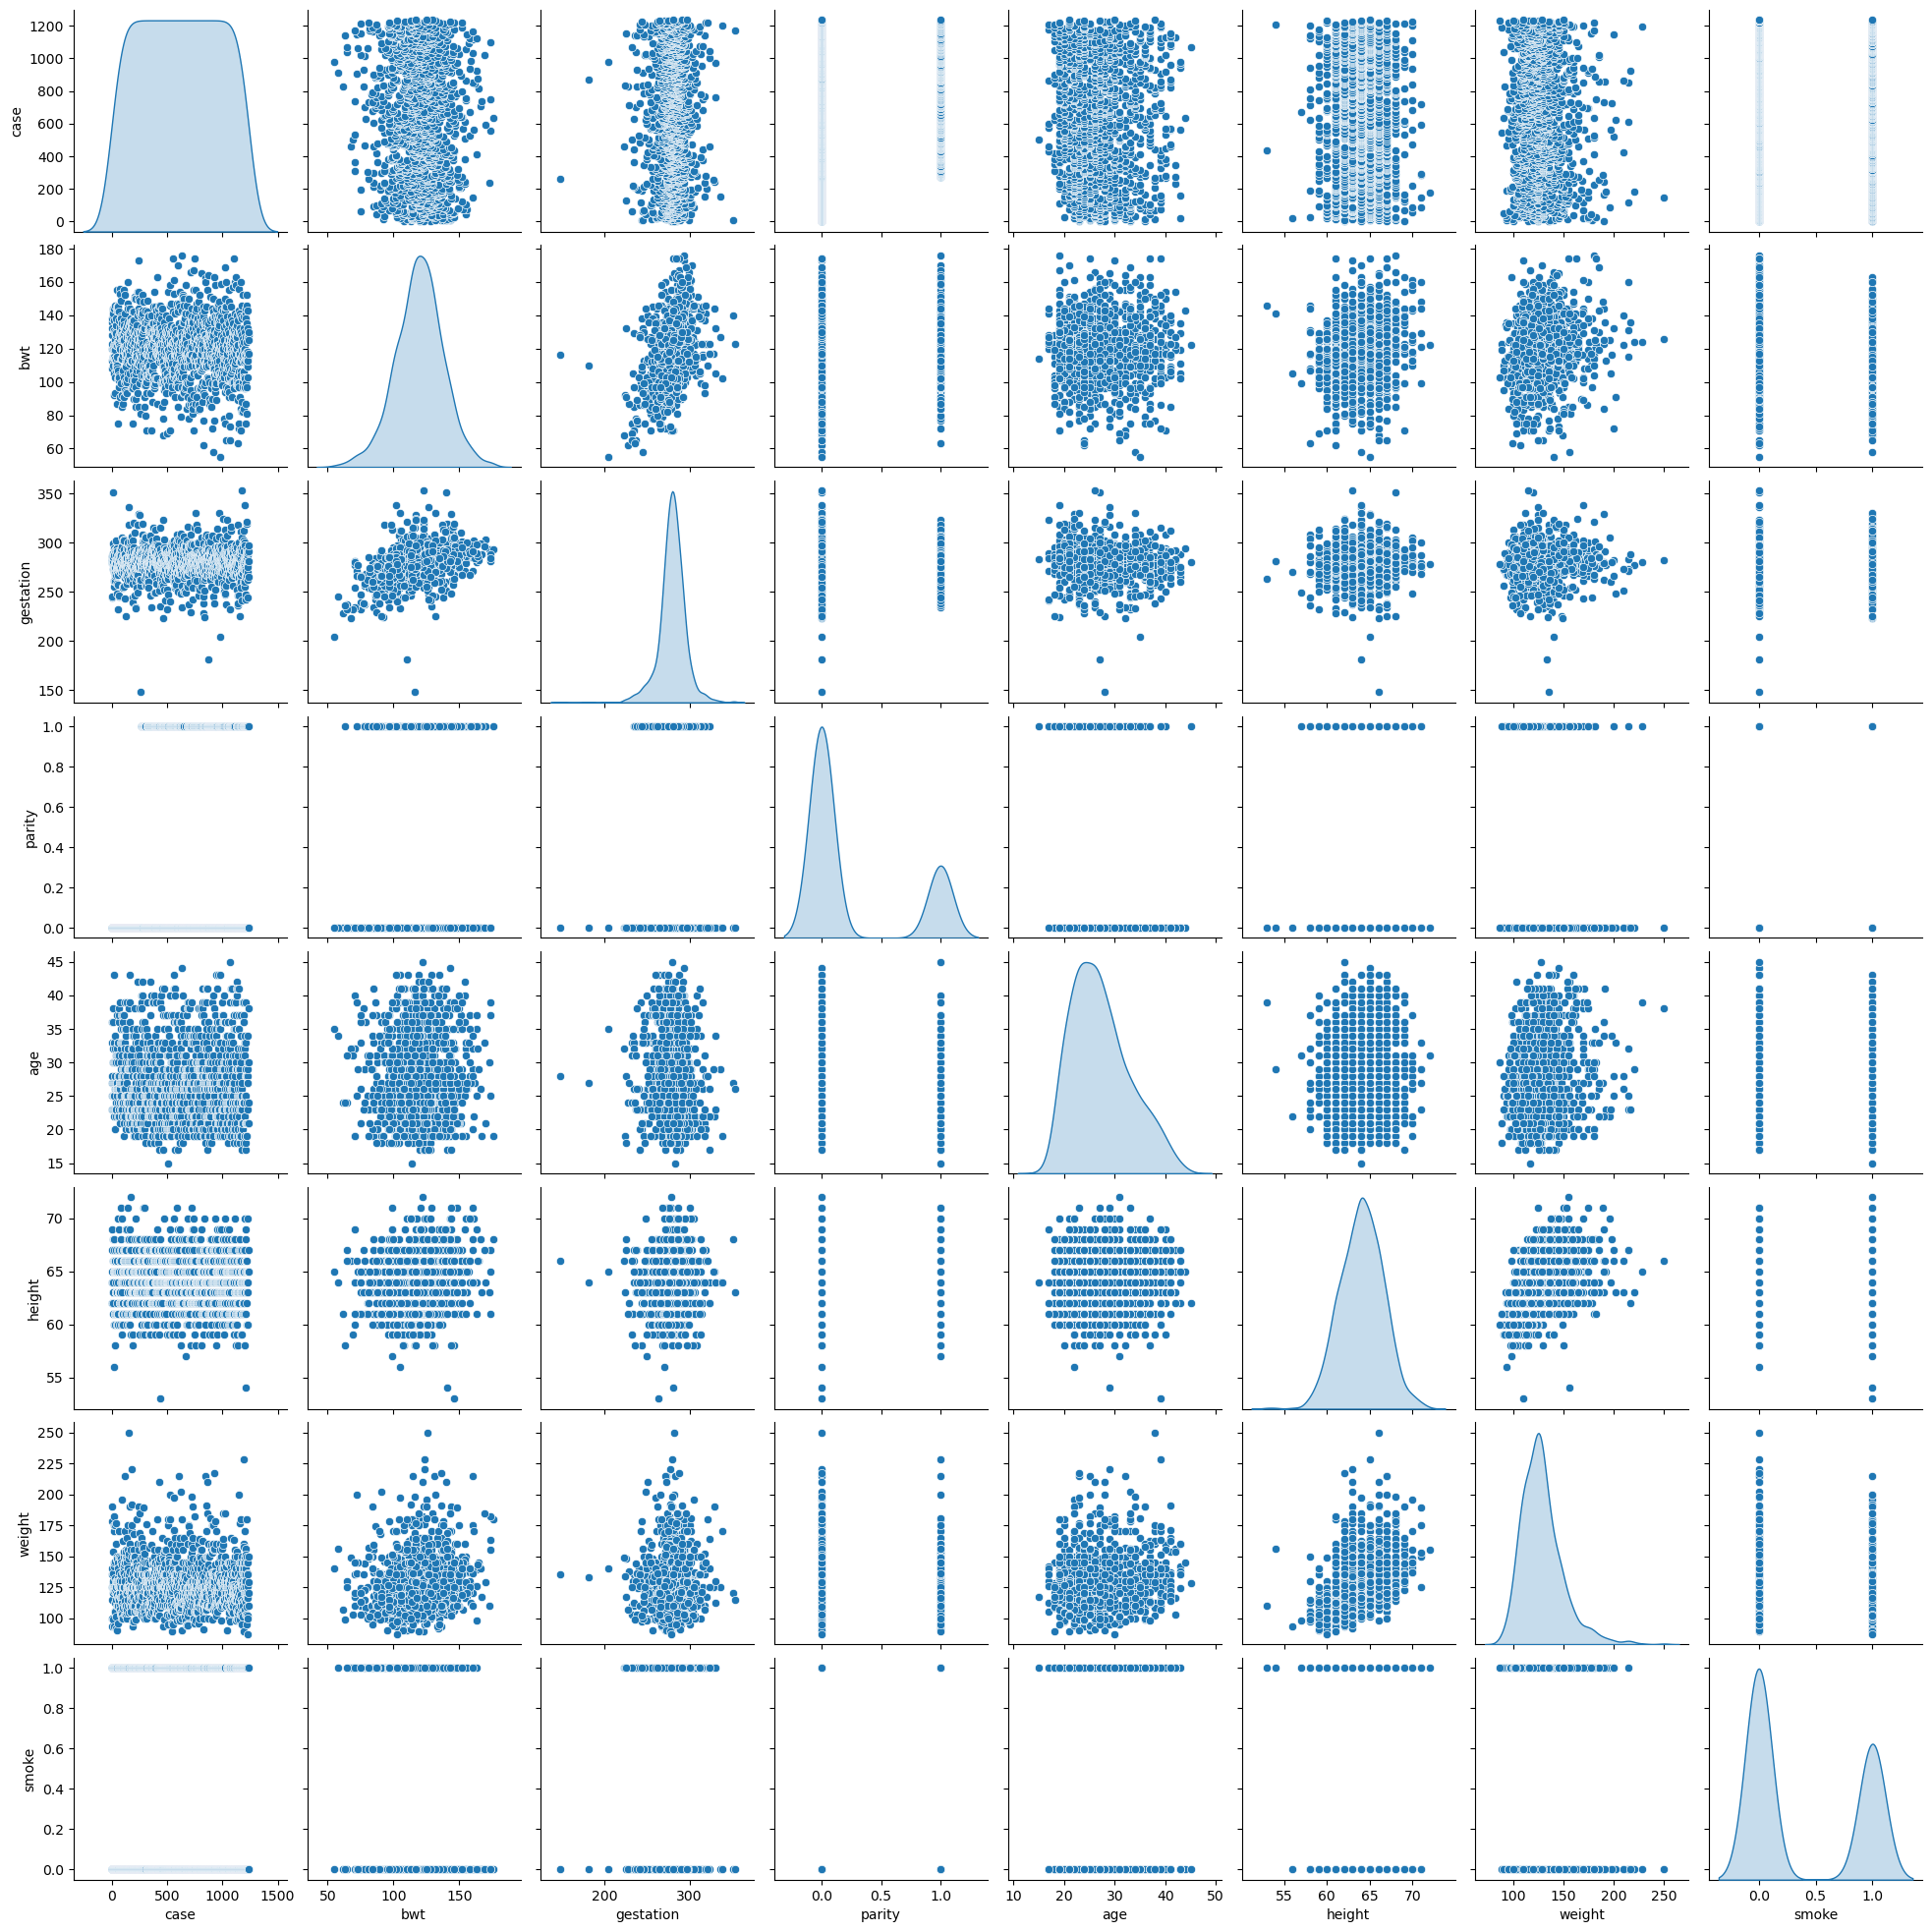

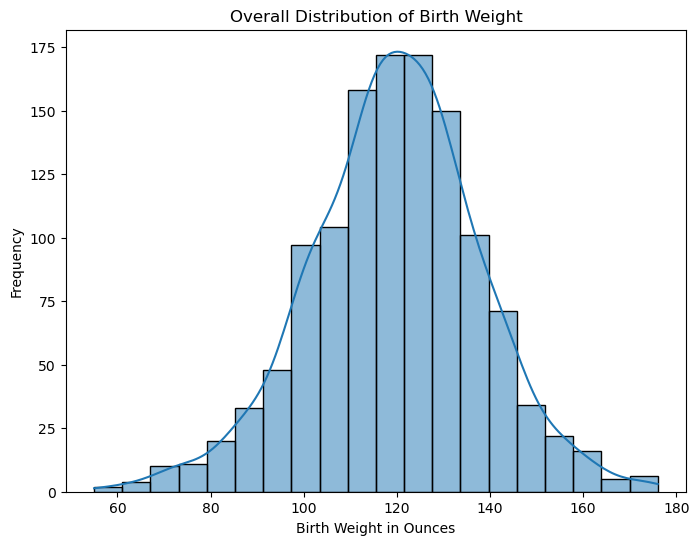

In [10]:
# Makes a correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Between Features")
plt.show()

# Pairplot to see relationship
sns.pairplot(df, diag_kind="kde")
plt.show()

# Histogram of birthweight
plt.figure(figsize=(8, 6))
sns.histplot(df['bwt'], bins=20, kde=True)
plt.xlabel('Birth Weight in Ounces')
plt.ylabel('Frequency')
plt.title('Overall Distribution of Birth Weight')
plt.show()

Missing values were filled with either the median or mode.

There is a correlation of -0.07 between smoking and age meaning there is a slight tendency for younger mothers to smoke more than older mothers, but it isn't very significant. There is almost no relationship between smoking and parity, meaning that whether it is a first pregnancy does not matter. There is a correlation between smoking and birth weight at -0.24 which means there is a weak and negative relationship. So, smoking may be associated with a lower birth rate.

The histogram shows a bell shaped distribution. The most common birthweight seems to be 120 ounces. 

## Part 3: 
Feature Selection: 
This part demonstrates which features are useful to build the model with a breif explaination as to why. Data science relies heavily on experimentation and this part shows this part of the process.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Defines the features and the target
X = df.drop(columns=['bwt'])
y = df['bwt']

# Training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes the train model and Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance score
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances.round(2))

gestation    0.34
case         0.19
weight       0.17
age          0.13
height       0.11
smoke        0.04
parity       0.02
dtype: float64


I will be choosing gestation, weight, age, height, and smoke as features in my model. This is because they have the most predictive power over birth weight of an infant. Case and parity will be taken out because they aren't meaningful to predicting birthweight. In fact, parity has the lowest importance score of 0.02. Even though case's importance score is high it isn't meaningful because the number just represents the ID.

Pros and Cons:
Gestation (Picked): Pros are that it has the strongest predicitve power and is strongly related to birth weight. Cons are that it doesn't show the lifestyle factors of the mother.
Case (Not picked): Pros are that it doesn't have any meaningful predictors. There are no cons to the decision.
Weight (Picked): Pros of the decision is that it does have some insight on growth. It could show the mental health of the mother. Cons are that it isn't as predictive as assumed.
Age (Picked): Pros of choosing age is because it shows connections to health and economic status. Cons are that it has a weaker correlation than others.
Height (Picked): Pros are that it show moms physicalities and this could correlate to fetal size. Cons are that it has a weaker correlation than others.
Smoke (Picked): Pros are that this is known to negatively affect infant weight. Cons are that it has a low importance score.
Parity (Not Picked): Pros of not picking it are that it has low predictive power. Cons to not choosing it are that it could have links to mother's health history.

## Part 4: 
Data Partitioning:
This step partitions the prepared data into train/test sets, and ensures that the partitions are reproducible. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drops the collumns that weren't picked in the previous question
df = df.drop(columns=['case', 'parity'], errors='ignore')

# Sets up the feature and target variable
X = df.drop(columns=['bwt'])
y = df['bwt']

# Partitions data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scales the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Prints out info to confirm the split
print("Training test:", X_train.shape)
print("Test set:", X_test.shape)
print("Target training set:", y_train.shape)
print("Target test set:", y_test.shape)

Training test: (988, 5)
Test set: (248, 5)
Target training set: (988,)
Target test set: (248,)


## Part 5: 
Model Development:
This part uses the Random Forest algorithm and builds a machine learning model that predicts birth weight.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initializes random forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Trains the model
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf_model.predict(X_test)

## Part 6: 
Model Evaluation: Evaluates the predictions from the model and comments on the results. 

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluates the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rsquared = r2_score(y_test, y_pred)

print(f"Mean absolute error is {mae:.2f}")
print(f"Mean Squared error is {mse:.2f}")
print(f"R Squared score is {rsquared:.2f}")

Mean absolute error is 13.92
Mean Squared error is 303.97
R Squared score is 0.23


## Part 7: 
Model Tuning: Tests the model with five different values for the n_estimators parameters to determine of the model improved.

In [47]:
# Initializes where the results of each model are going to be stored
result_list = []

# Different values of n for testing
n_estimators_list = [50, 100, 150, 200, 250]

for n in n_estimators_list:
    # Initializes model and puts the n_estimators value in it
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)

    # Trains the model
    rf_model.fit(X_train, y_train)

    # Gets predictions on the test set
    y_pred = rf_model.predict(X_test)

    #Evaluates the predictions
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rsquared = r2_score(y_test, y_pred)

    #Fill result_list with the results
    result_list.append({'n_estimators': n, 'MAE': round(mae, 2), 'MSE': round(mse, 2), 'R Squared': round(rsquared, 2)})

# Changes result_list into a df
results_df = pd.DataFrame(result_list)
print(results_df)

   n_estimators    MAE     MSE  R Squared
0            50  14.04  310.23       0.21
1           100  13.92  303.97       0.23
2           150  13.91  302.74       0.23
3           200  13.99  305.10       0.23
4           250  13.94  302.75       0.23


## Part 8: 
This part will perform parts 5-7 using the k-nn algorithm.

Part 8 (K-NN Model Development) below

In [52]:
from sklearn.neighbors import KNeighborsRegressor

# Initializes k-NN regressor with k
knn_model = KNeighborsRegressor(n_neighbors=5)

# Trains the model
knn_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_knn = knn_model.predict(X_test)

Part 8 (Model Evaluation) below

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluates the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean absolute error is {mae:.2f}")
print(f"Mean Squared error is {mse:.2f}")
print(f"Root mean squared error score is {rmse:.2f}")

Mean absolute error is 13.94
Mean Squared error is 302.75
Root mean squared error score is 17.40


Part 8 (Model Tuning) below

In [58]:
# Initializes where the results of each model are going to be stored
result_list = []
best_rmse_knn = float('inf')
best_k = None

# Different values of k for testing
k_values = [3, 5, 7, 9, 11]

for k in k_values:
    # Initializes model and puts the n_estimators value in it
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Trains the model
    knn_model.fit(X_train, y_train)

    # Gets predictions on the test set
    y_pred_knn = knn_model.predict(X_test)

    #Evaluates the predictions
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mse_knn)

    #Fill result_list with the results
    result_list.append((k, rmse_knn))
    print(f"k={k}: RMSE={round(rmse_knn, 2)}")

    # If rmse is lower than update the best model
    if rmse_knn < best_rmse_knn:
        best_rmse_knn = rmse_knn
        best_k = k

# Prints best model
print(f"Best model is k={best_k} with RMSE={round(best_rmse_knn, 2)}")

k=3: RMSE=19.23
k=5: RMSE=17.99
k=7: RMSE=17.51
k=9: RMSE=17.43
k=11: RMSE=16.94
Best model is k=11 with RMSE=16.94


## Part 9
Explaination and comparison of the best model from both the Random Forest and K-NN algorithms and which is best for predicting birthweight.

The RMSE for K-NN is 16.94 with the best model being k=11.
To get the rmse of Random Forest model you take the square root of the MSE which is 303.97. This gives an RMSE of 17.44. Since RMSE 16.94 < RMSE 17.44 this means that the K-NN model is more accurate and suitable for predicting birth weight. 